In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns #requires seaborn version 0.11.1 - upgrade using 'pip install seaborn --upgrade'
import squarify #library for treemap, install using 'pip install squarify'

In [2]:
%matplotlib inline

In [3]:
#Imports data from Google Form
df = pd.read_csv('survey.csv', index_col=None)
#checks import is correct
df.head().append(df.tail())

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,4,"Follow regulations, PPE, Symptoms checks, Dail...","Premature return, Health regulations not met, ...",Strongly disagree,Strongly agree,"Access to facilities, Seeing colleagues",Extremely uncomfortable,2,NaN,Female,35-44 years old,With Children
1,2,Nothing,NaN,Neutral,Neutral,"Access to facilities, Seeing colleagues",I do not travel for work,5,NaN,Male,35-44 years old,With Children
2,3,"Follow regulations, Symptoms checks, Daily san...","Health regulations not met, Disinfection, Avai...",Strongly disagree,Strongly agree,"Better work/life balance, Access to facilities...",Extremely uncomfortable,4,NaN,Male,35-44 years old,No Children
3,4,"Symptoms checks, Daily sanitisation, Available...","Premature return, Readjustment to office, Comm...",Strongly agree,Strongly agree,"Better work/life balance, Access to facilities...",Comfortable,5,Maybe go back gradually - 1 day per week then ...,Female,25-34 years old,No Children
4,1,"PPE, Daily sanitisation",No concerns,Strongly agree,Neutral,"Better work/life balance, Easier collaboration...",Extremely comfortable,5,NaN,Female,25-34 years old,No Children
47,4,Nothing,"Health regulations not met, In-person interact...",Strongly disagree,Strongly agree,"No longer working from home , Better work/life...",Extremely uncomfortable,3,NaN,Male,+55 years old,No Children
48,2,Daily sanitisation,"Disinfection, Childcare, Readjustment to offic...",Neutral,Agree,"No longer working from home , Better work/life...",Neither comfortable nor uncomfortable,3,NaN,Male,35-44 years old,With Children
49,3,"Follow regulations, Symptoms checks, Daily san...","Premature return, Health regulations not met, ...",Agree,Neutral,No longer working from home,Uncomfortable,4,Staggered start times so rush hour isn't so cr...,Female,35-44 years old,No Children
50,4,"Daily sanitisation, Available sanitizing suppl...","Childcare, Readjustment to office, Commuting",Disagree,Agree,Seeing colleagues,I do not travel for work,4,NaN,Female,35-44 years old,With Children
51,2,Social distancing,"Premature return, Health regulations not met, ...",Strongly agree,Agree,Seeing colleagues,Neither comfortable nor uncomfortable,5,"Allow it to be optional, clear communication f...",Male,25-34 years old,No Children


Plotting Q1: "How comfortable are you returning to work (e.g., in an office, outside of your home, or at a specific location)?"

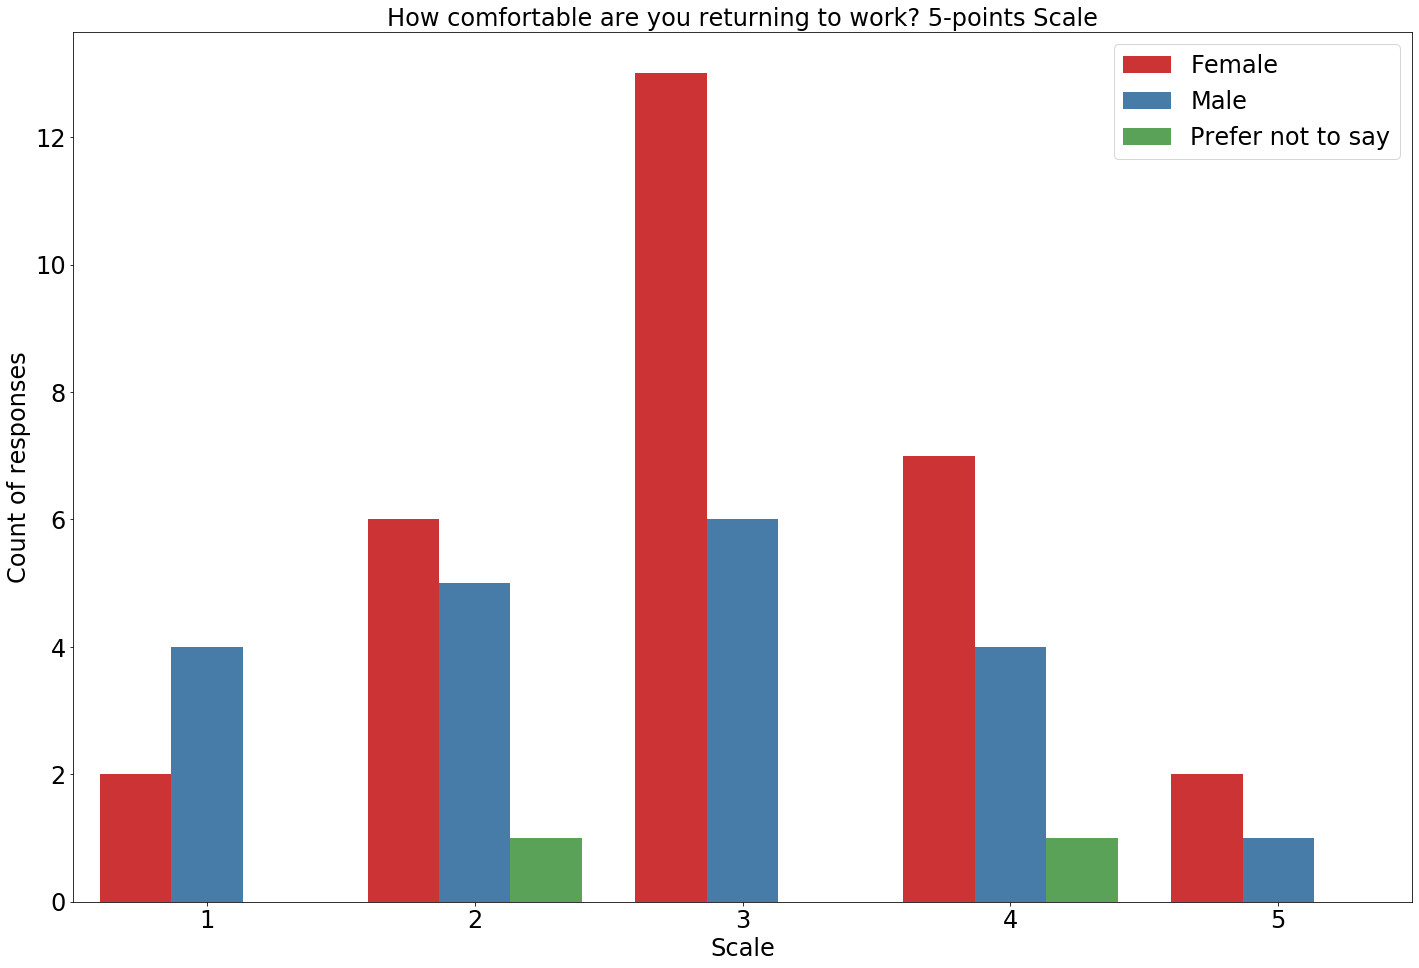

In [4]:
fig_dims = (24, 16)
fig, ax = plt.subplots(figsize=fig_dims)

# Building the actual graph
ax = sns.countplot(x="Q1", hue="Q10", data=df, palette="Set1")

#Change legend size of text
ax.legend(loc='upper right', fontsize=24)
ax.set_title('How comfortable are you returning to work? 5-points Scale', fontsize=24)

#Change naming of axis, and change size of text
ax.set_xlabel('Scale',fontsize=24);
ax.set_ylabel('Count of responses',fontsize=24)

#Change size of axis labels
ax.tick_params(labelsize=24)

plt.savefig("Q1.png", dpi=200, facecolor='w', edgecolor='w', format=None,
        transparent=False,)
plt.show()


In [5]:
#processes % values for survey analysis
comfortable_scale = pd.crosstab(index=df["Q1"], 
                          columns=df["Q10"],
                          margins = True)

comfortable_scale.columns = ["Female", "Male", "Prefer not to say", "rowtotal"]
comfortable_scale.index = ['1', '2', '3', '4', '5','coltotal']

comfortable_scale1 = comfortable_scale/comfortable_scale.loc["coltotal","rowtotal"]

comfortable_scale1

,Female,Male,Prefer not to say,rowtotal
1,0.038462,0.076923,0.000000,0.115385
2,0.115385,0.096154,0.019231,0.230769
3,0.250000,0.115385,0.000000,0.365385
4,0.134615,0.076923,0.019231,0.230769
5,0.038462,0.019231,0.000000,0.057692
coltotal,0.576923,0.384615,0.038462,1.000000


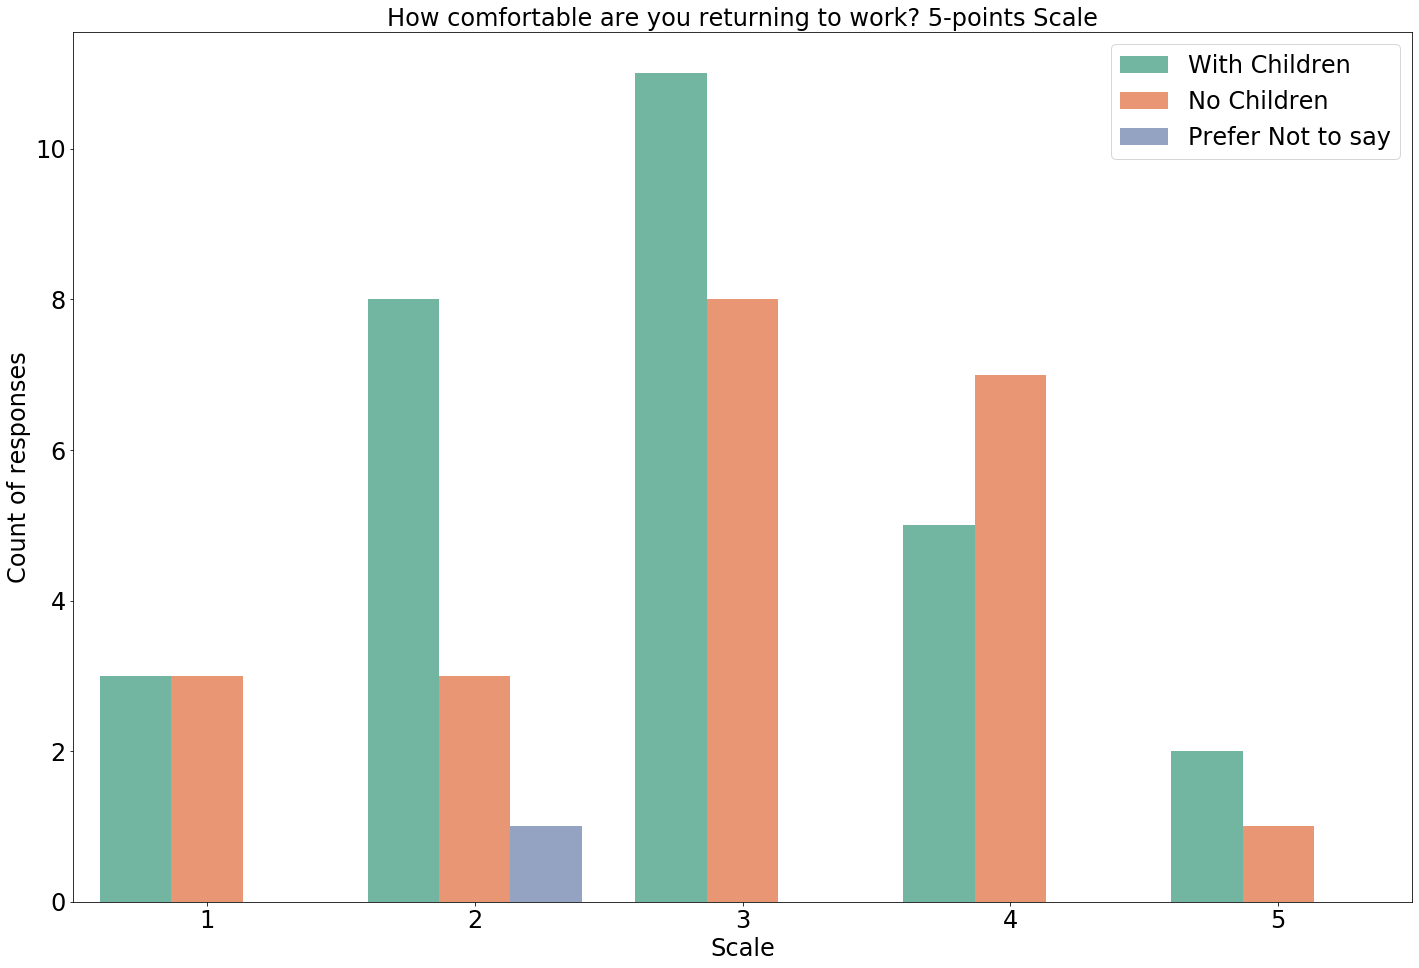

In [6]:
#plots Q1 this time by remote workers living with and without children
fig_dims = (24, 16)
fig, ax = plt.subplots(figsize=fig_dims)
width = 0.35

# Building the actual graph
ax = sns.countplot(x="Q1", hue="Q12", data=df, palette="Set2")

#Change legend size of text
ax.legend(loc='upper right', fontsize=24)
ax.set_title('How comfortable are you returning to work? 5-points Scale', fontsize=24)

#Change naming of axis, and change size of text
ax.set_xlabel('Scale',fontsize=24);
ax.set_ylabel('Count of responses',fontsize=24)

#Change size of axis labels
ax.tick_params(labelsize=24)

plt.savefig("Q1_children.png", dpi=150, facecolor='w', edgecolor='w', format=None,
        transparent=False,)
plt.show()


In [7]:
#processes % values for survey analysis

children_scale = pd.crosstab(index=df["Q1"], 
                          columns=df["Q12"],
                          margins = True)

children_scale.columns = ["With Children", "No Children", "Prefer not to say", "rowtotal"]
children_scale.index = ['1', '2', '3', '4', '5','coltotal']

children_scale1 = children_scale/children_scale.loc["coltotal","rowtotal"]

children_scale1

,With Children,No Children,Prefer not to say,rowtotal
1,0.057692,0.000000,0.057692,0.115385
2,0.057692,0.019231,0.153846,0.230769
3,0.153846,0.000000,0.211538,0.365385
4,0.134615,0.000000,0.096154,0.230769
5,0.019231,0.000000,0.038462,0.057692
coltotal,0.423077,0.019231,0.557692,1.000000


Plotting Q2: "What factors would help you feel more comfortable? Please select all that apply."

In [8]:
#Visualizing Q2
df1 = pd.read_csv('survey.csv', usecols=[1,9])
df1.head()

,Q2,Q10
0,"Follow regulations, PPE, Symptoms checks, Dail...",Female
1,Nothing,Male
2,"Follow regulations, Symptoms checks, Daily san...",Male
3,"Symptoms checks, Daily sanitisation, Available...",Female
4,"PPE, Daily sanitisation",Female


In [9]:
#adds index to new dataframe
df1.index.name ='id'

In [10]:
#split comma-separated values into columns
factors=df1['Q2'].str.split(', ',expand=True)
factors.head()

,0,1,2,3,4,5
id,,,,,,
0,Follow regulations,PPE,Symptoms checks,Daily sanitisation,Available sanitizing supplies,Social distancing
1,Nothing,None,None,None,None,None
2,Follow regulations,Symptoms checks,Daily sanitisation,Available sanitizing supplies,Social distancing,None
3,Symptoms checks,Daily sanitisation,Available sanitizing supplies,None,None,None
4,PPE,Daily sanitisation,None,None,None,None


In [11]:
#stack new columns into a single one and add id for joining purposes
factors=factors.stack()
factors.name='Factors'
factors=factors.astype('category')
factors.index.names=['id','reasons']
factors.head()

id  reasons
0   0                     Follow regulations
    1                                    PPE
    2                        Symptoms checks
    3                     Daily sanitisation
    4          Available sanitizing supplies
Name: Factors, dtype: category
Categories (7, object): [Available sanitizing supplies, Daily sanitisation, Follow regulations, Nothing, PPE, Social distancing, Symptoms checks]

In [12]:
#join all factors and check new size of dataframe
df_factors=df1.join(factors)
df_factors.describe()

,Q2,Q10,Factors
count,174,174,174
unique,21,3,7
top,"Follow regulations, PPE, Symptoms checks, Dail...",Female,Daily sanitisation
freq,42,113,36


In [13]:
#counts values by category
data = pd.value_counts(df_factors['Factors']).to_frame().reset_index()

print(data)

                           index  Factors
0             Daily sanitisation       36
1              Social distancing       34
2             Follow regulations       30
3  Available sanitizing supplies       28
4                Symptoms checks       25
5                            PPE       13
6                        Nothing        8


In [14]:
#defines variables for treemap
cmap = mpl.cm.Reds
mini = min(data['Factors'])
maxi = max(data['Factors'])
norm = mpl.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in data['Factors']]

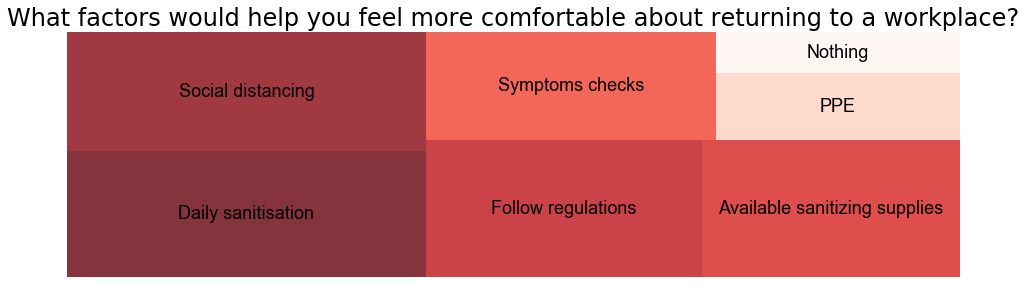

In [15]:
#Plots question 2 using a treemap
squarify.plot(sizes=data['Factors'], label=data['index'], alpha=.8, color=colors, pad=False, text_kwargs={'fontsize':18, 'fontname':"Arial"})
plt.axis('off')
fig = mpl.pyplot.gcf()
fig.set_size_inches(16, 4.5)
plt.title('What factors would help you feel more comfortable about returning to a workplace?',fontsize=24)
#Saves chart as png
plt.savefig("Q2.png", dpi=150, facecolor='w', edgecolor='w', format=None,
        transparent=False)
plt.show()

Plotting Q3: "What are your main concerns about going back into your usual workplace? Please select all that apply."

In [16]:
#plots data using diverging bar charts also known as Tornado charts
df_Q3 = pd.read_csv('survey.csv', usecols=[2,9])
df_Q3 = df_Q3.sort_values(by=['Q10'], ascending=True)
df_Q3.head()

,Q3,Q10
0,"Premature return, Health regulations not met, ...",Female
37,"Premature return, Health regulations not met, ...",Female
31,"Health regulations not met, Childcare, Commuting",Female
39,No concerns,Female
28,"Health regulations not met, Disinfection, Read...",Female


In [17]:
#adds index to new dataframe
df_Q3.index.name ='id'

In [18]:
# Remove all 'prefer not to say' responses.
df_Q3 = df_Q3.loc[df_Q3['Q10'] != 'Prefer not to say']

In [19]:
#split comma-separated values into columns
concerns=df_Q3['Q3'].str.split(', ',expand=True)
concerns.head()

,0,1,2,3,4,5,6,7
id,,,,,,,,
0,Premature return,Health regulations not met,Disinfection,Readjustment to office,Commuting,None,None,None
37,Premature return,Health regulations not met,Disinfection,Childcare,Commuting,None,None,None
31,Health regulations not met,Childcare,Commuting,None,None,None,None,None
39,No concerns,None,None,None,None,None,None,None
28,Health regulations not met,Disinfection,Readjustment to office,In-person interactions,None,None,None,None


In [20]:
#stack new columns into a single one and add id for joining purposes
concerns=concerns.stack()
concerns.name='Concerns'
concerns=concerns.astype('category')
concerns.index.names=['id','concerns']
concerns.head()

id  concerns
0   0                     Premature return
    1           Health regulations not met
    2                         Disinfection
    3               Readjustment to office
    4                            Commuting
Name: Concerns, dtype: category
Categories (9, object): [Availability of PPE, Childcare, Commuting, Disinfection, ..., In-person interactions, No concerns, Premature return, Readjustment to office]

In [21]:
#join all factors and check new size of dataframe
df_concerns=df_Q3.join(concerns)
df_concerns.describe()

,Q3,Q10,Concerns
count,159,159,159
unique,33,2,9
top,"Health regulations not met, Disinfection, Chil...",Female,Commuting
freq,10,101,34


In [22]:
data_Q3 = pd.crosstab(index=df_concerns['Concerns'], columns=df_concerns['Q10'], dropna=True).reset_index()
data_Q3 = data_Q3.sort_values(by='Female', ascending=True)
print(data_Q3)

Q10                    Concerns  Female  Male
6                   No concerns       3     2
0           Availability of PPE       5     4
5        In-person interactions       7     4
7              Premature return       9     6
1                     Childcare      12     7
3                  Disinfection      13     8
8        Readjustment to office      14     5
4    Health regulations not met      15    11
2                     Commuting      23    11


In [23]:
Concerns = data_Q3['Concerns']
num_concerns = len(Concerns)
Female = data_Q3['Female']
Male = data_Q3['Male']
pos = np.arange(num_concerns) + .5


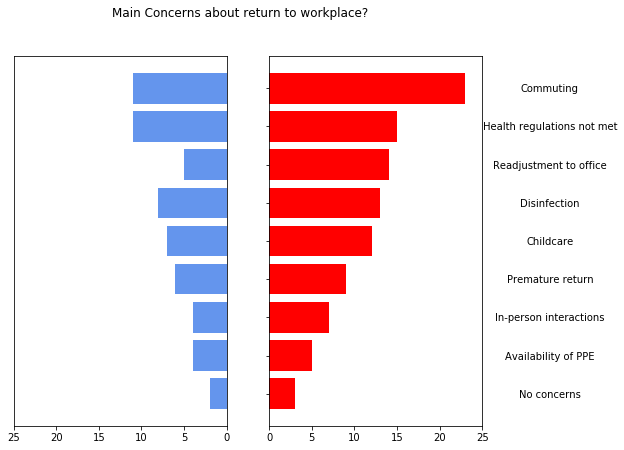

In [24]:
fig, (ax_left, ax_right) = plt.subplots(ncols=2)
fig.set_size_inches(8.4, 6.8)

ax_left.barh(pos, Male, align='center', facecolor='cornflowerblue')

ax_left.set_yticks([])

ax_left.invert_xaxis()

ax_right.barh(pos, Female, align='center', facecolor='red')

ax_right.set_yticks(pos)

ax_right.set_yticklabels(Concerns, ha='center', x=+1.35)

plt.suptitle('Main Concerns about return to workplace?')

#ax_left.set_xlim(20)

ax_left.set_xticks(np.linspace(0,25,num=6)) # Line written with assistance from another student
ax_right.set_xticks(np.linspace(0,25,num=6)) # Line written with assistance from another student

#Saves chart as .png
plt.savefig("Q3.png", dpi=150, facecolor='w', format=None, bbox_inches='tight',
        transparent=False)

plt.show()

Plotting Q4 and Q5 Agreement statements together for comparison purposes: <br>
Q4) "I believe employers should determine their own health and safety policies/protocols so that employees can go back to office buildings. (Agree/Disagree)"<br>
Q5) "I believe the Government should determine health and safety policies/protocols so that employees can go back to office buildings. (Agree/Disagree)"

In [25]:
#reads data from main file
df2 = pd.read_csv('survey.csv', index_col=None, usecols= [3,4,9])

In [26]:
df2 = df2.loc[df2['Q10'] != 'Prefer not to say']
print(df2.shape)
#Q4_scale.head()

(50, 3)


In [27]:
#processes % for survey analysis comments
Q4_scale = pd.crosstab(index=df2["Q4"], 
                          columns=df2["Q10"],
                          margins = True)

Q4_scale.columns = ["Female", "Male", "rowtotal"]
Q4_scale.index = ['1', '2', '3', '4', '5','coltotal']
Q4_scale1 = Q4_scale/Q4_scale.loc["coltotal","rowtotal"]

Q4_df = Q4_scale1.drop(['coltotal'])
Q4_df = Q4_df.round(2)

Q4_df_result = Q4_df['rowtotal']
Q4_df_result

1    0.16
2    0.26
3    0.26
4    0.12
5    0.20
Name: rowtotal, dtype: float64

In [28]:
#processes % for survey analysis comments
Q5_scale = pd.crosstab(index=df2["Q5"], 
                          columns=df2["Q10"],
                          margins = True)

Q5_scale.columns = ["Female", "Male", "rowtotal"]
Q5_scale.index = ['1', '2', '3', '4', '5','coltotal']
Q5_scale1 = Q5_scale/Q5_scale.loc["coltotal","rowtotal"]

Q5_df = Q5_scale1.drop(['coltotal'])
Q5_df = Q5_df.round(2)

Q5_df_result = Q5_df['rowtotal']
Q5_df_result

1    0.48
2    0.04
3    0.24
4    0.18
5    0.06
Name: rowtotal, dtype: float64

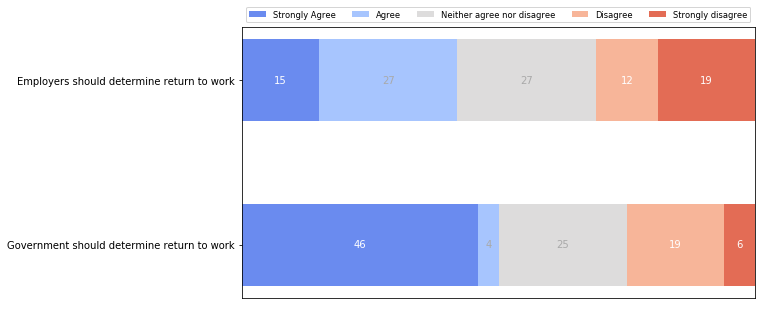

In [29]:
#Visualizing Q4 and Q5 side by side for comparison, using horizontal bar chart

category_names = ['Strongly Agree', 'Agree',
                  'Neither agree nor disagree', 'Disagree', 'Strongly disagree']
results = {
    'Employers should determine return to work': [15,27,27,12,19],
    'Government should determine return to work': [46, 4, 25, 19, 6]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('coolwarm')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
#Saves chart as .png
plt.savefig("Q4_5.png", dpi=150, facecolor='w', edgecolor='w', format=None,
        transparent=False,)
plt.show()

Plotting question 6) 'What are you looking forward to about returning to your workplace? Please select all that apply.'

In [51]:
#Imports data from Google Form
df_Q6 = pd.read_csv('survey.csv', usecols=[5,9])
df_Q6 = df_Q6.sort_values(by=['Q10'], ascending=True)
df_Q6.head()

,Q6,Q10
0,"Access to facilities, Seeing colleagues",Female
37,"Easier collaboration, Office perks, Seeing col...",Female
31,"Easier collaboration, Access to facilities, Se...",Female
39,"Easier collaboration, Seeing colleagues",Female
28,Easier collaboration,Female


In [52]:
#adds index to new dataframe, same as with Q3
df_Q6.index.name ='id'

In [53]:
# Remove all 'prefer not to say' responses.
df_Q6 = df_Q6.loc[df_Q6['Q10'] != 'Prefer not to say']

In [54]:
#split comma-separated values into columns
reasons=df_Q6['Q6'].str.split(', ',expand=True)
reasons.head()

,0,1,2,3,4,5,6,7
id,,,,,,,,
0,Access to facilities,Seeing colleagues,None,None,None,None,None,None
37,Easier collaboration,Office perks,Seeing colleagues,None,None,None,None,None
31,Easier collaboration,Access to facilities,Seeing colleagues,None,None,None,None,None
39,Easier collaboration,Seeing colleagues,None,None,None,None,None,None
28,Easier collaboration,None,None,None,None,None,None,None


In [55]:
#stack new columns into a single one and add id for joining purposes
reasons=reasons.stack()
reasons.name='Reasons'
reasons=reasons.astype('category')
reasons.index.names=['id','reasons']
reasons.head()

id  reasons
0   0          Access to facilities
    1             Seeing colleagues
37  0          Easier collaboration
    1                  Office perks
    2             Seeing colleagues
Name: Reasons, dtype: category
Categories (8, object): [Access to facilities, Better work/life balance, Easier access to resources, Easier collaboration, In-person courses, No longer working from home, Office perks, Seeing colleagues]

In [56]:
#join all factors and check new size of dataframe
df_reasons=df_Q6.join(reasons)
df_reasons.describe()

,Q6,Q10,Reasons
count,175,175,175
unique,35,2,8
top,"Easier collaboration, Seeing colleagues",Female,Seeing colleagues
freq,12,102,46


In [57]:
data_Q6 = pd.crosstab(index=df_reasons['Reasons'], columns=df_reasons['Q10'], dropna=True).reset_index()
data_Q6 = data_Q6.sort_values(by='Female', ascending=True)
print(data_Q6)

Q10                      Reasons  Female  Male
5    No longer working from home       5     5
1       Better work/life balance       7     9
4              In-person courses       8     3
6                   Office perks       9     9
0           Access to facilities      11    10
2     Easier access to resources      11     4
3           Easier collaboration      24    14
7              Seeing colleagues      27    19


In [58]:
Reasons = data_Q6['Reasons']
num_reasons = len(Reasons)
Female = data_Q6['Female']
Male = data_Q6['Male']
pos = np.arange(num_reasons) + .5

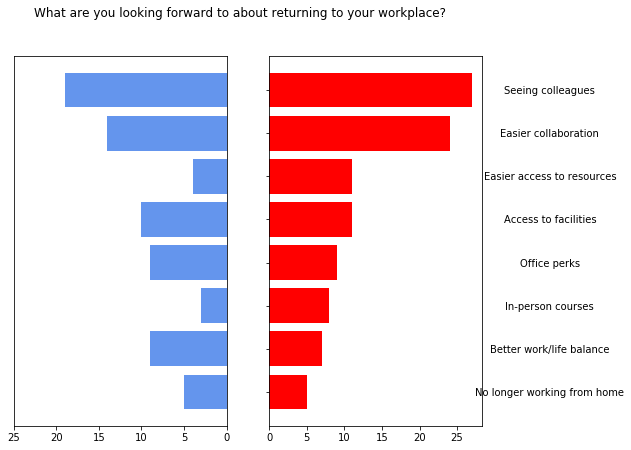

In [59]:
fig, (ax_left, ax_right) = plt.subplots(ncols=2)
fig.set_size_inches(8.4, 6.8)

ax_left.barh(pos, Male, align='center', facecolor='cornflowerblue')

ax_left.set_yticks([])

ax_left.invert_xaxis()

ax_right.barh(pos, Female, align='center', facecolor='red')

ax_right.set_yticks(pos)

ax_right.set_yticklabels(Reasons, ha='center', x=+1.35)

plt.suptitle('What are you looking forward to about returning to your workplace?')

#ax_left.set_xlim(20)

ax_left.set_xticks(np.linspace(0,25,num=6)) # Line written with assistance from another student
ax_right.set_xticks(np.linspace(0,25,num=6)) # Line written with assistance from another student

#Saves chart as .png
plt.savefig("Q6.png", dpi=150, facecolor='w', format=None, bbox_inches='tight',
        transparent=False)

plt.show()

Plotting Q7: "If your role requires you to travel, how comfortable do you feel traveling at this time?"

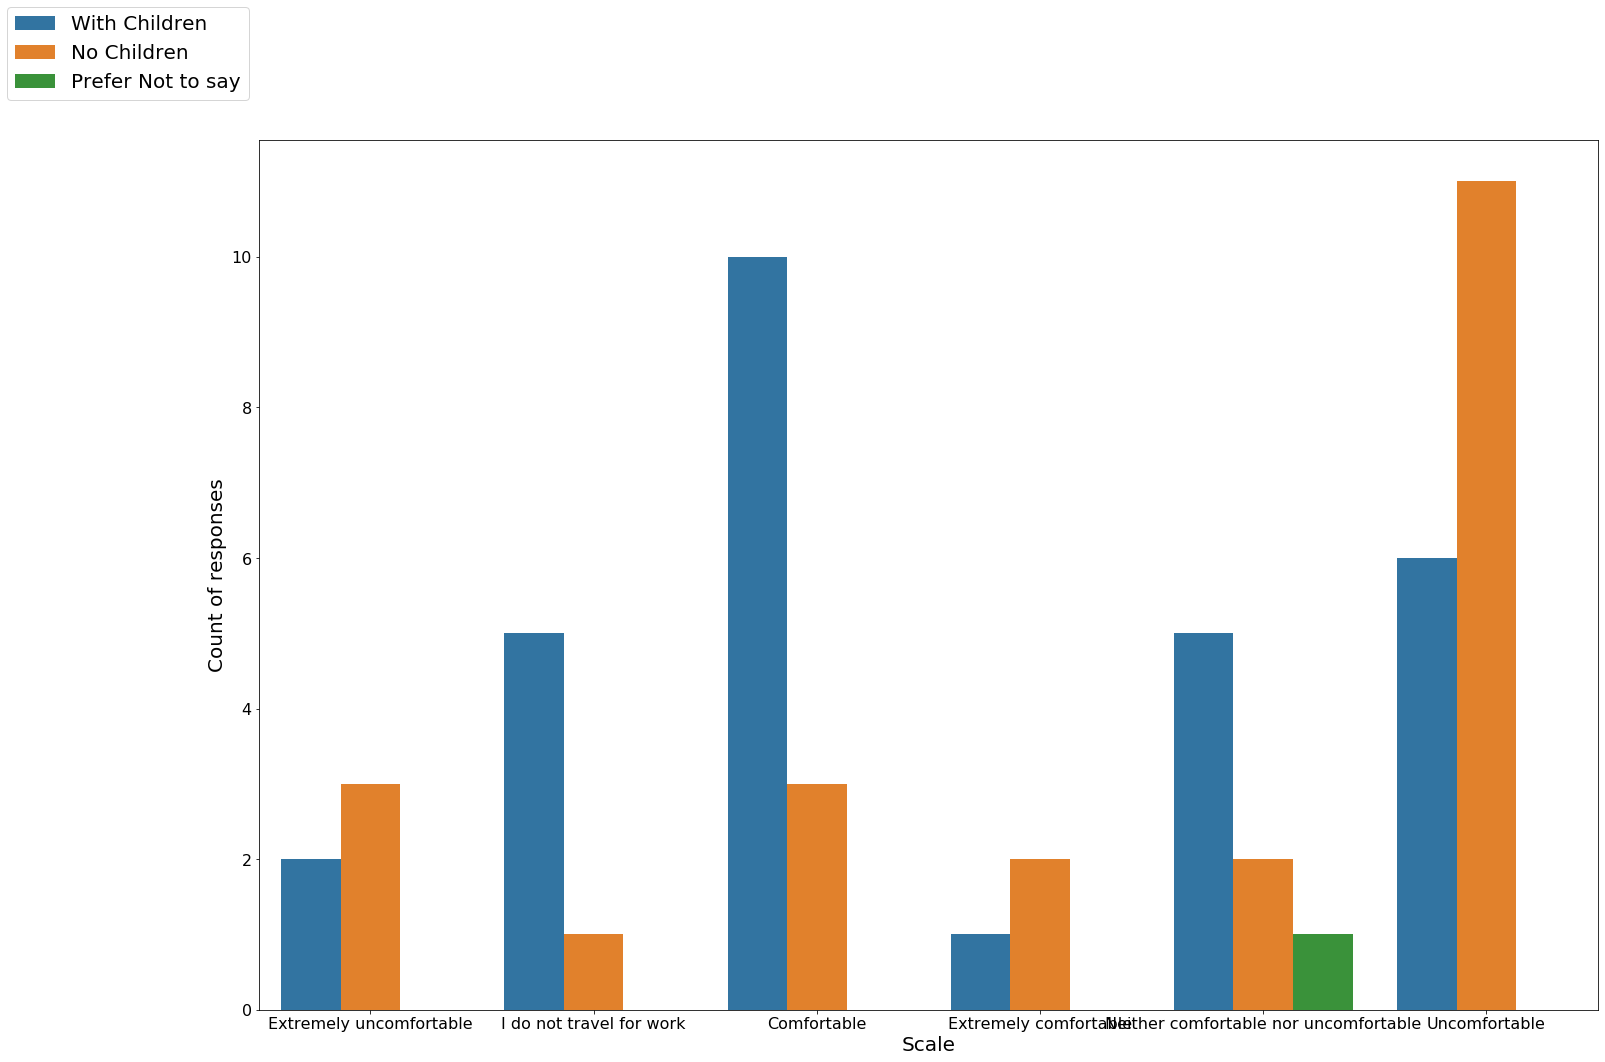

In [39]:
#define variables
fig_dims = (24, 16)
fig, ax = plt.subplots(figsize=fig_dims)

# Building the actual graph
ax = sns.countplot(x="Q7", hue="Q12", data=df)

#Change legend size of text
ax.legend(loc='right', fontsize=20,bbox_to_anchor=(0, 1.1))

#Change naming of axis, and change size of text
ax.set_xlabel('Scale',fontsize=20);
ax.set_ylabel('Count of responses',fontsize=20)

#Change size of axis labels
ax.tick_params(labelsize=16)

#Saves chart as .png
plt.savefig("Q7.png", dpi=150, facecolor='w', edgecolor='w', format=None,
        transparent=False)

plt.show()

Plotting Q8: "I have the resources I need to get back to work quickly."

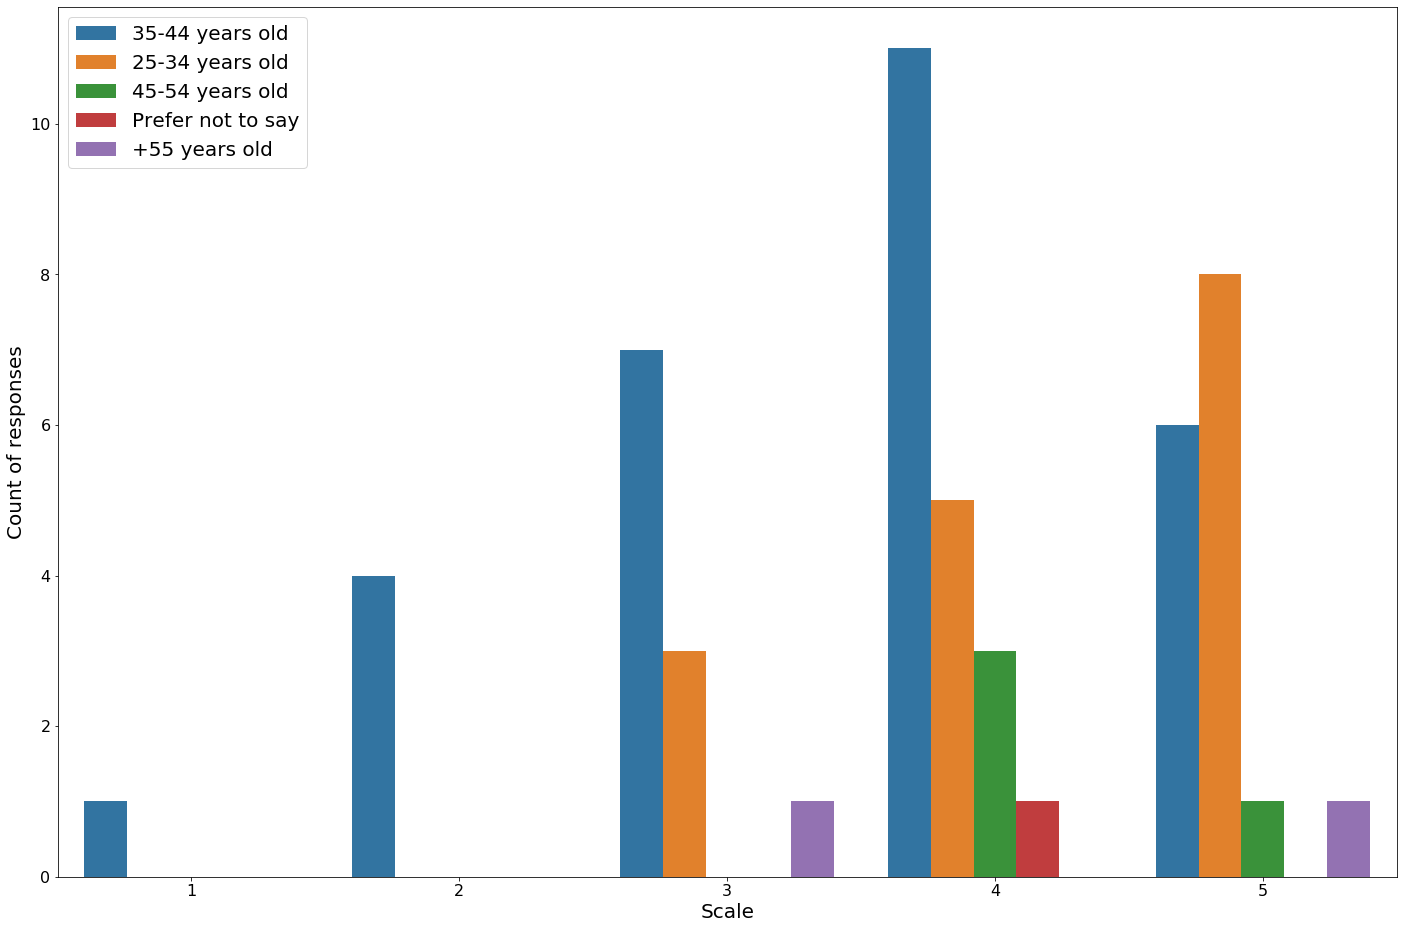

In [40]:
fig_dims = (24, 16)
fig, ax = plt.subplots(figsize=fig_dims)

# Building the actual graph
ax = sns.countplot(x="Q8", hue="Q11", data=df)

#Change legend size of text
ax.legend(loc='upper left', fontsize=20)

#Change naming of axis, and change size of text
ax.set_xlabel('Scale',fontsize=20);
ax.set_ylabel('Count of responses',fontsize=20)

#Change size of axis labels
ax.tick_params(labelsize=16)

#Saves chart as .png
plt.savefig("Q8.png", dpi=150, facecolor='w', edgecolor='w', format=None,
        transparent=False)

plt.show()

Plotting open-ended question 9) 'Do you have any suggestions on how to make the transition back to work easier? Please explain.'

In [41]:
#Imports wordcloud library for generating a Wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #pip install wordcloud

In [42]:
#Reads only column with open-ended responses
df5 = pd.read_csv('survey.csv', usecols=[8], header=None)
df5 = df5.dropna()

In [43]:
#converts dataframe from object to string
text = str(df5)

In [44]:
#removes stopwords
stopwords = set(STOPWORDS)
stopwords.update(["stopword1", "stopword2"])
cloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)


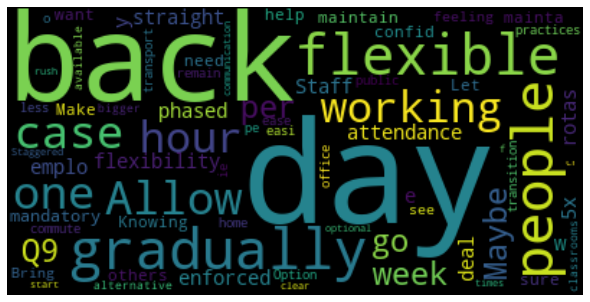

In [45]:
#generates Wordcloud to read most frequent terms
cloud = WordCloud().generate(text)
plt.figure(figsize=(8, 8), facecolor='white')
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
#Exports wordcloud as image
cloud.to_file("Q9_cloud.png")

Plotting Demographics<br>
Q10: "Please indicate your preferred gender"<br>
Q11: "Please tell us your age"<br>
Q12: "Are there children living in your household?"


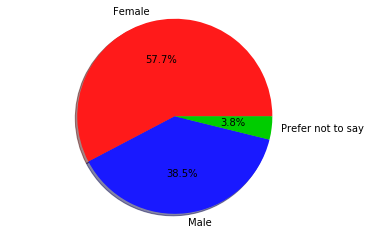

In [46]:
#Plotting Gender distribution
colors = ['#ff1a1a','#1919ff','#00cc00']
labels = df['Q10'].astype('category').cat.categories.tolist()
counts = df['Q10'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
#Saves chart as .png
plt.savefig("Q10.png", dpi=150, facecolor='w', edgecolor='w', format=None,
        transparent=False)
plt.show()

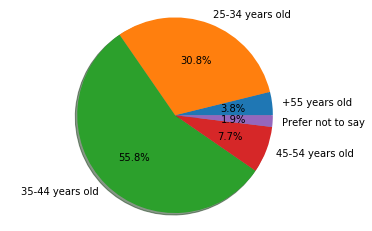

In [47]:
#Plotting Age distribution
labels = df['Q11'].astype('category').cat.categories.tolist()
counts = df['Q11'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
#Saves chart as .png
plt.savefig("Q11.png", dpi=150, facecolor='w', edgecolor='w', format=None,
        transparent=False)
plt.show()

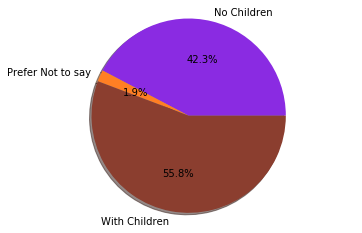

In [48]:
#Plotting Household composition
colors = ['#8a2be2','#ff7f24','#8b3e2f']
labels = df['Q12'].astype('category').cat.categories.tolist()
counts = df['Q12'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
#Saves chart as .png
plt.savefig("Q12.png", dpi=150, facecolor='w', edgecolor='w', format=None,
        transparent=False)
plt.show()

In [49]:
#End of analysis